<a href="https://colab.research.google.com/github/Rahilzakir/Global_terorism_EDA/blob/main/Capstone_Project_Global_terrorism_EDA_by_Rahil_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- EDA on Global Terrorism Database**
## Contribution type: Individual

#**Project Summary**

The Global Terrorism Data Set is a comprehensive collection of information on terrorism incidents from around the world. The data set includes information on the date and location of the incident, the number of casualties, the type of attack, and the motivations behind the attack, among other variables.

The data set has been collected over several decades and covers a wide range of terrorist incidents, including bombings, assassinations, hijackings, and kidnappings. It is an invaluable resource for researchers, policy-makers, and analysts who are interested in studying terrorism and its causes and effects. to calculate the data sets and the posible outcome i have process the data in order to get much information possible, this operation is done on the bases of and organisation which analysis the data world wide and get to know the most of the best insights from the data , we process the data into following steps and pre processing steps where missing and the null values replaced. i trired to make the data as origanal as posible and didnt temper that much. we see this data as per the global watch and trying to find the valuable inputs we first see the region wise imact of terroris, and see the higly effacted countries and thier cities, then, we have more attribites which show us the deaths faced by countries and people who got wouned next we have the majorly impact groups with terrorism, the dead people come from the majorly which specific area, after this we will have an look on the type of attack happend by the mode, weather its a suicide or its a assault attack, next to this we will see the aspects according to the india domain the loss of the india and its neighbour most of the graph type is bar due to comparison mode. why so much bar graphs: Bar graphs are used to represent and compare categorical data. They are often used to display the frequency or count of items within a category. For example, you can use a bar graph to show the number of people who belong to different age groups, the number of products sold in different categories, or the number of students who scored a certain range of marks in an exam.

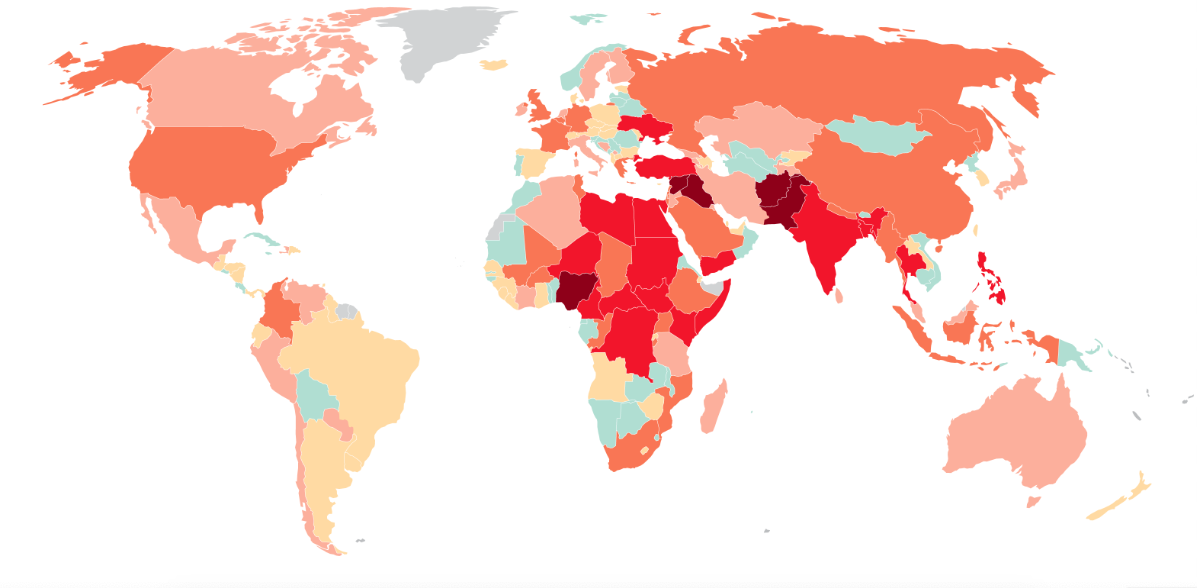

*The above image not a part of EDA visualisation.*

*Areas where terrorism-related activities are most intensive. The darker the red, the more affected the country.*
*Image refrence: https://www.geospatialworld.net/blogs/maps-of-global-terrorism/*

#**Lets Begin !**

##**1.Know Your Data**

###Import Libraries

This code imports the necessary libraries for data analysis and visualization, including:

pandas for data manipulation and analysis numpy for numerical operations

matplotlib.pyplot for plotting and visualization.

seaborn for higher level visualization

It also suppresses warnings and mounts Google Drive to access files stored there

In [120]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud
from google.colab import drive

In [121]:
# Mount drive
drive.mount('/content/drive')

# Retrieve data from csv file
filepath = '/content/drive/MyDrive/DataSet/Global Terrorism Data.csv'
globa_terr_data = pd.read_csv(filepath, encoding='latin1', low_memory=False)

# Create dataframe
gt_df = pd.DataFrame(globa_terr_data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN



# ***This EDA project is made by Rahil Shaikh***

# **Explore and analyze the data to discover key findings pertaining to terrorist activities.**

**Understanding of Data**

In [25]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
gt_df.shape

(181691, 135)

There are total 181691 Rows And 135 Columns in the DataFrame

In [27]:
list(gt_df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [28]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


The .describe() method in pandas is used to generate descriptive statistics of a DataFrame. It provides various statistical measures for each numerical column in the DataFrame, such as count, mean, standard deviation, minimum, quartiles like 25%, 50%, 75%, and maximum values.

# **Finding the percentage of missing values columns wise**

In [29]:
#To get the percentage of null values each column wise
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df)
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

# **Data Cleaning**

In [30]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)
drop_columns_list

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

So this is list of colums that have more then 15% missing values

In [31]:
# Dropping the Missing value columns from the data set
gt_df.drop(drop_columns_list,inplace=True,axis=1)
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [32]:
gt_df.shape

(181691, 47)

In [33]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df) #To get the percentage of null values each column wise
missingvalues_percentage

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1_txt    0.057091
targsubtype1        0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1             0.008581
natlty1_txt         0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
doubtterr           0.000006
multiple            0.000006
individual          0.000000
INT_MISC            0.000000
gname               0.000000
weaptype1_txt       0.000000
weaptype1           0.000000
property            0.000000
INT_IDEO            0.000000
INT_LOG             0.000000
dbsource            0.000000
eventid             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targtype1           0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country       

We will analyse following set of columns for our analysis:

Year, Month, Country, Region, State, City, ishostkid, Successs, Nationality of Casualty, Attack type, Target type, Weapon type, Killed, Wounded, Gang name.

In [34]:
gt_df.drop(columns={'eventid','extended','country','targsubtype1','region','weaptype1','weapsubtype1','specificity',
                  'vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide','attacktype1','targtype1','targsubtype1_txt',
                  'target1','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO',
                  'INT_MISC','INT_ANY'
                  },inplace=True,axis=1)

In [14]:

gt_df.shape

(181691, 18)

In [35]:
gt_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1,natlty1_txt,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,United States,Unknown,Explosives,NaN,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,United States,Unknown,Incendiary,NaN,NaN,0.0


# **Data Manipulation & Handling Missing Values :**

In [36]:
gt_df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude", 'success':'Success',"location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type", 'targsubtype1_txt':'Target_subtype', "targtype1_txt":"Target Type",
                   "gname":"Group Name", 'natlty1_txt':'Nationality', "motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)



In [37]:
gt_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Latitude', 'Longitude', 'Success', 'Attack Type', 'Target Type',
       'natlty1', 'Nationality', 'Group Name', 'Weapon Type', 'Killed',
       'Wounded', 'ishostkid'],
      dtype='object')

In [38]:
gt_df.shape

(181691, 19)

In [39]:
gt_df['Province/State']= gt_df['Province/State'].fillna('Unknown')
gt_df['City']=gt_df['City'].fillna('Unknown')
gt_df['Target Type']= gt_df['Target Type'].fillna("Others")
gt_df['Killed']=gt_df['Killed'].fillna(0)
gt_df['Wounded']=gt_df['Wounded'].fillna(0)
gt_df['Casualty']=gt_df['Killed']+gt_df['Wounded']

In [40]:
gt_df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Success,Attack Type,Target Type,natlty1,Nationality,Group Name,Weapon Type,Killed,Wounded,ishostkid,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,United States,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,United States,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,United States,Unknown,Incendiary,0.0,0.0,0.0,0.0


In [41]:
gt_df.describe()

,Year,Month,Day,Latitude,Longitude,Success,natlty1,Killed,Wounded,ishostkid,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,180132.000000,181691.000000,181691.000000,181513.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,127.686441,2.266860,2.883296,0.059054,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,89.299120,11.227057,34.309747,0.461244,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,4.000000,0.000000,0.000000,-9.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,101.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,173.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1004.000000,1570.000000,8191.000000,1.000000,9574.000000


Observations:
1. The data consists of Terrorist Activities ranging from year 1970 to 2017.
2. Maximum number of people Killed in an event were 1570
3. Maximum number of people Wounded in an event were 8191
4. Maximum number of people Casualty in an event were 9574


# **General Analysis**

In [42]:
print("Country with most attacks: ",gt_df["Country"].value_counts().idxmax())
print("City with most attacks: ",gt_df["City"].value_counts().index[1])
print("Region with most attacks: ",gt_df["Region"].value_counts().idxmax())
print("Year with most attacks: ",gt_df["Year"].value_counts().idxmax())
print("Month with most attacks: ",gt_df["Month"].value_counts().idxmax())
print("Group with most attacks: ",gt_df["Group Name"].value_counts().index[1])
print("Most Attack Types: ",gt_df["Attack Type"].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


 OUTPUT:

Country with most attacks: Iraq

City with most attacks:  Baghdad

Region with most attacks:  Middle East & North Africa

Year with most attacks:  2014

Month with most attacks:  5

Group with most attacks:  Taliban

Most Attack Types:  Bombing/Explosion

In [43]:
gt_df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Success,Attack Type,Target Type,natlty1,Nationality,Group Name,Weapon Type,Killed,Wounded,ishostkid,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,United States,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,United States,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,United States,Unknown,Incendiary,0.0,0.0,0.0,0.0


# **Visualizing the data**

# Attacks Analysis

## 1. Year wise Attacks



### Number of Attacks in each Year

In [77]:
attacks=gt_df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


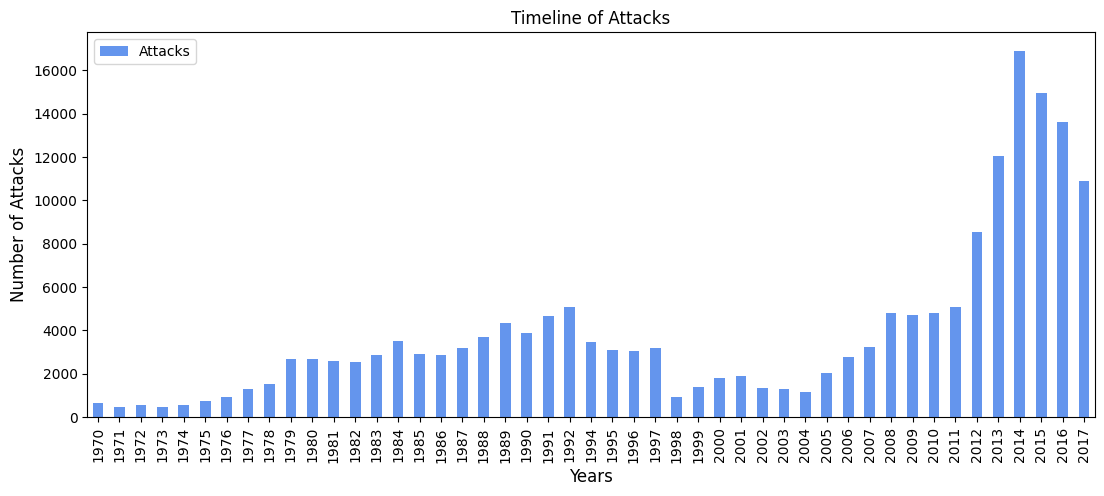

In [114]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(13,5),fontsize=10)
plt.title("Timeline of Attacks",fontsize=12)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

(1). Most number of attacks(16903) in year 2014

(2). Least number of attacks(471) in year 1971

> ## Total Casualties (Killed + Wounded) in each Year




In [91]:
yc=gt_df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


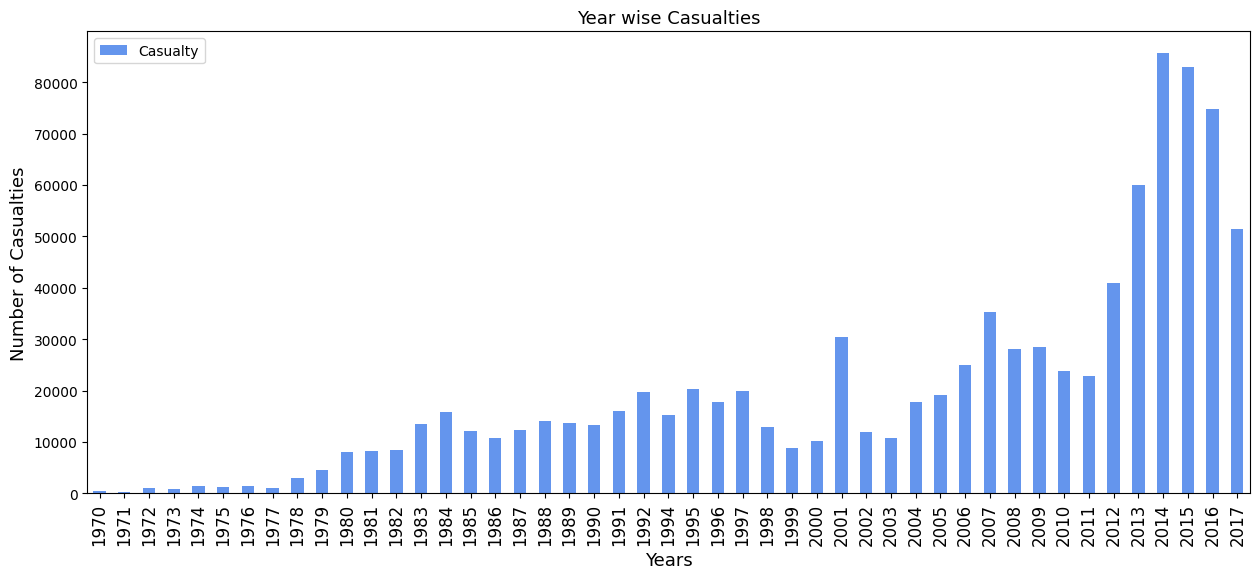

In [92]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


1. Most number of casualties: 85618 in year 2014

2. Least number of casualties: 255 in year 1971



>## Killed in each Year



In [94]:
yk=gt_df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


> ## Wounded in each Region

In [95]:
yw=gt_df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


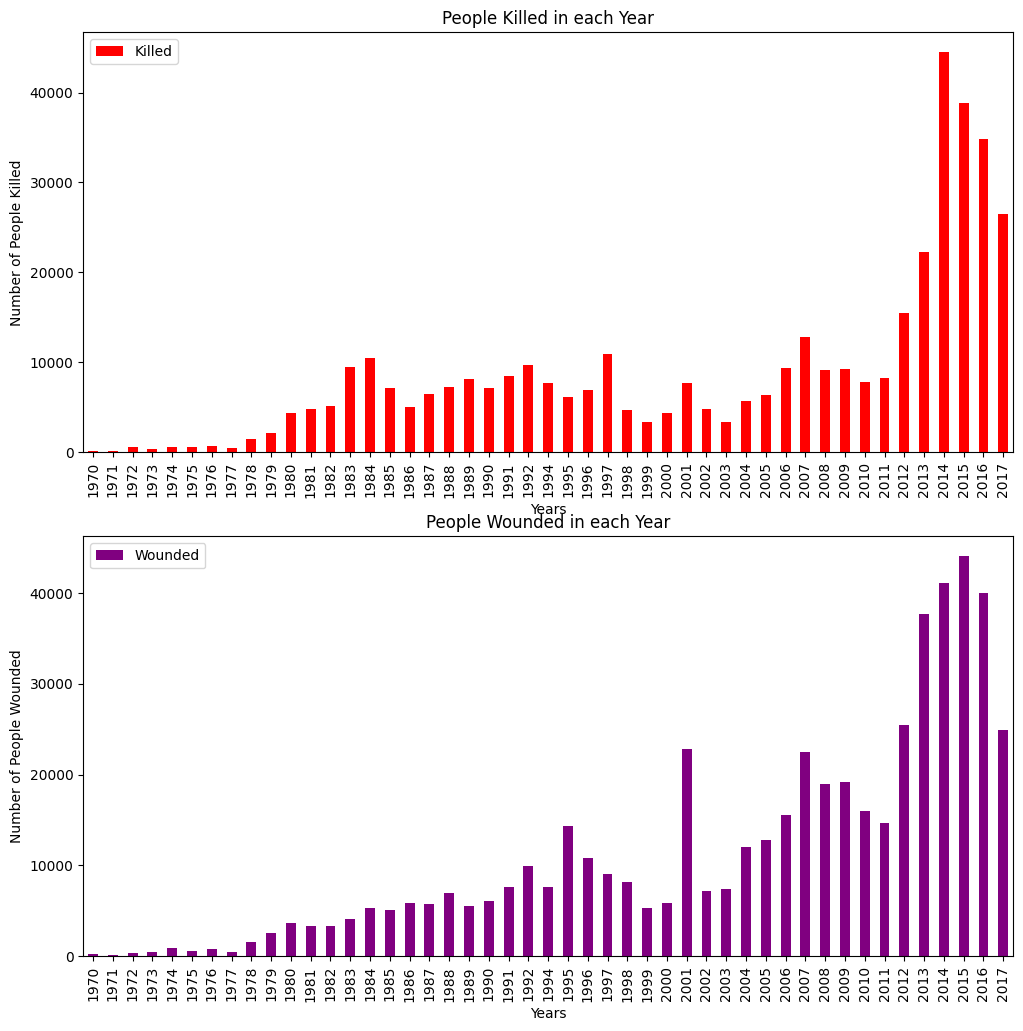

In [115]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="red",figsize=(12,12),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="purple",figsize=(12,12),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# Observations
## Year wise Attacks :

(i) Attacks

  (a) Most number of attacks: 16903 in 2014

  (b) Least number of attacks: 471 in 1971

(ii) Casualties

  (a) Most number of casualties: 85618 in 2014

  (b) Least number of casualties: 255 in 1971

(iii) Killed

  (a) Most number of people killed: 44490 in 2014

  (b) Least number of people killed: 173 in 1971

(iv) Wounded

  (a) Most number of people wounded: 44043 in 2015

  (b) Least number of people wounded: 82 in 1971

# 2. Region wise Attacks

### Distribution of Terrorist Attacks over Regions from 1970-2017

In [101]:
reg=pd.crosstab(gt_df.Year,gt_df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


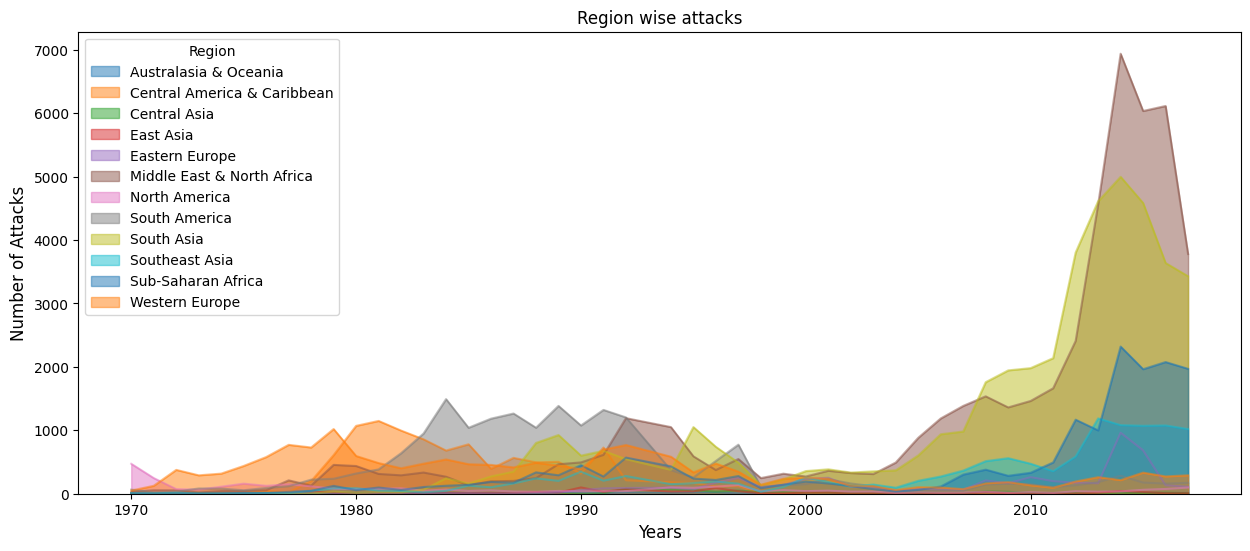

In [112]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(15,6))
plt.title("Region wise attacks",fontsize=12)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

# **5. Casualty Analysis.**

##**5.1 Demography of casualities by location.**


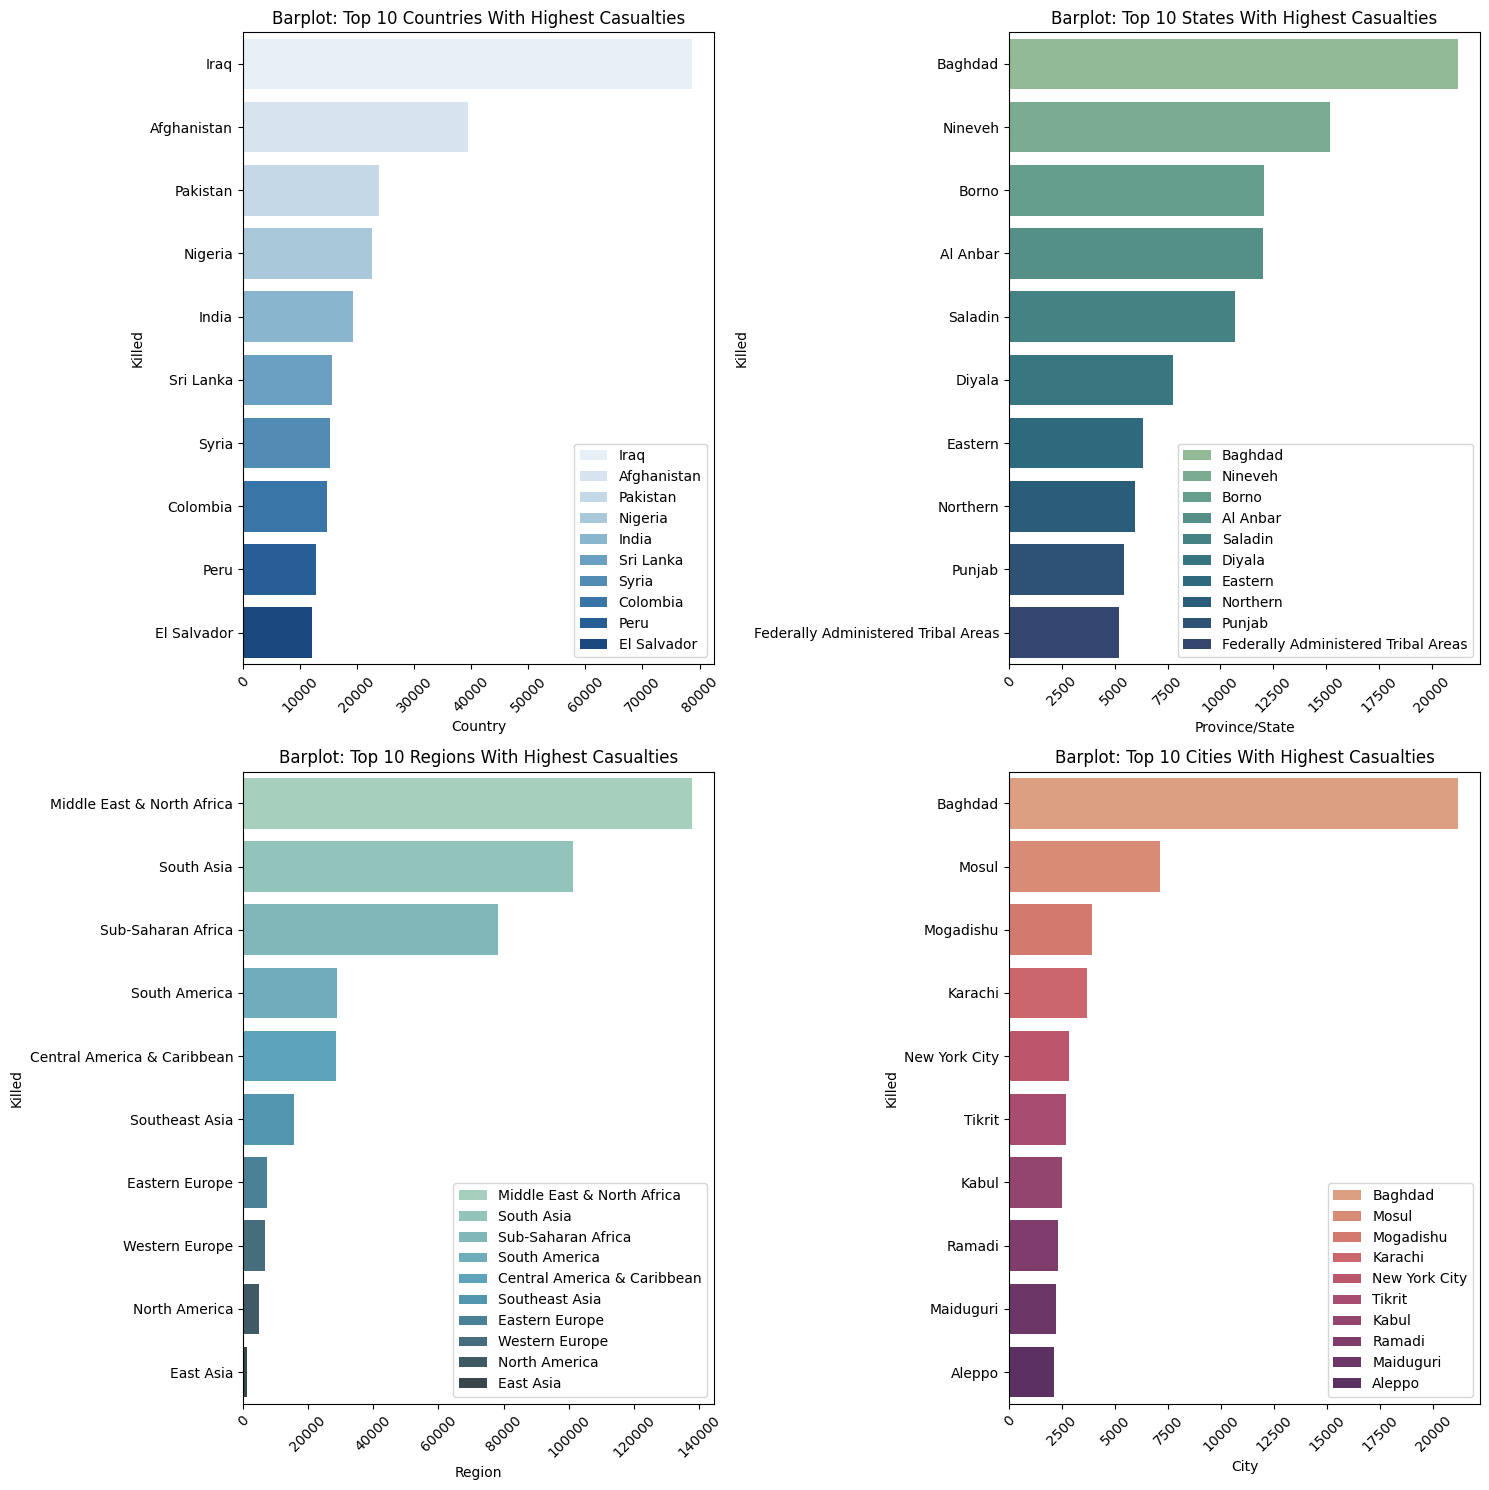

In [75]:
# Prepare dataframes
top_countries = gt_df.groupby('Country')['Killed'].sum().nlargest(10)
top_countries = top_countries.drop('Unknown', errors='ignore')

top_regions = gt_df.groupby('Region')['Killed'].sum().nlargest(10)
top_regions = top_regions.drop('Unknown', errors='ignore')

top_states = gt_df.groupby('Province/State')['Killed'].sum().nlargest(11)
top_states = top_states.drop('Unknown', errors='ignore')

top_cities = gt_df.groupby('City')['Killed'].sum().nlargest(11)
top_cities = top_cities.drop('Unknown', errors='ignore')

# Add margins between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Plot Subplot of Countries and add respective lables and tiltes
plt.subplot(2,2,1)
sns.barplot(y=top_countries.index, x=top_countries.values, label=top_countries.index, palette = 'Blues', orient = 'h')
plt.xlabel('Country')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Countries With Highest Casualties')
plt.xticks(rotation = 45)
plt.legend()
# Plot Subplot of States and add respective lables and tiltes
plt.subplot(2,2,2)
sns.barplot(y=top_states.index, x=top_states.values, label=top_states.index, palette = 'crest', orient = 'h')
plt.xlabel('Province/State')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 States With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Plot Subplot of Regions and add respective lables and tiltes
plt.subplot(2,2,3)
sns.barplot(y=top_regions.index, x=top_regions.values, label=top_regions.index, palette = 'GnBu_d', orient = 'h')
plt.xlabel('Region')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Regions With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Plot Subplot of Cities and add respective lables and tiltes
plt.subplot(2,2,4)
sns.barplot(y=top_cities.index, x=top_cities.values,label=top_cities.index, palette = 'flare', orient = 'h')
plt.xlabel('City')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Cities With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Set plot size
plt.gcf().set_size_inches(15,15)
plt.tight_layout()

# Display plot
plt.show()

**Observation:**


1) Among the top 10 countries, **Iraq** has the **most casualties**, while **El Salvador** has the **fewest**.

2) Among the top 10 states, **Baghbad** has the **most casualties**, while **Punjab(India)** has the **fewest**.

3) Among the top 10 regions, the **Middle East and North Africa** have the **highest number** of casualties, while **East Asia** has the **fewest**.

4) Among the top 10 cities, **Baghdad** have the **highest number of casualties**, while **Maiduguri** has the **lowest**.


##**5.2 Demography of casualities by Terrorist Groups**


Text(0.5, 0, 'Percentage Of kills')

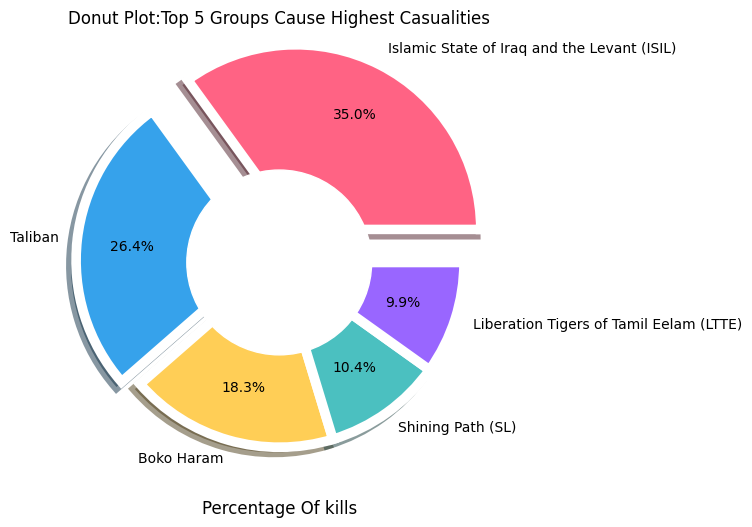

In [62]:
# Prepare datafrme
most_kills = gt_df.groupby('Group Name')['Killed'].sum().sort_values(ascending = False)
most_kills = most_kills.drop('Unknown')


# Plot Pieplot
plt.figure(figsize = (6,6))
colors = ['#ff6384', '#36a2eb', '#ffce56', '#4bc0c0', '#9966ff']

plt.pie(most_kills.head(), labels = most_kills.head().index, autopct='%1.1f%%', shadow = True, explode = (0.2,0.1,0,0,0),
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors = colors, pctdistance= 0.7)

my_circle = plt.Circle((0,0), 0.5, color = 'white')
plt.gcf().gca().add_artist(my_circle)

# Add title
plt.title('Donut Plot:Top 5 Groups Cause Highest Casualities')
plt.xlabel('Percentage Of kills', fontsize=12)

**Observation:**

1) Among the top 5 terrorist groups **Lineration Tigers of Tamil Eelam(LTTE)** caused the **most** casualties of **35.0 percentage**. :

2) Among the top 5 terrorist groups **Islamic State of Iraq the Levant(ISIL)** caused the **least** casualties of **9.9 percentage**.



##**5.2 Demography of casualities by year**


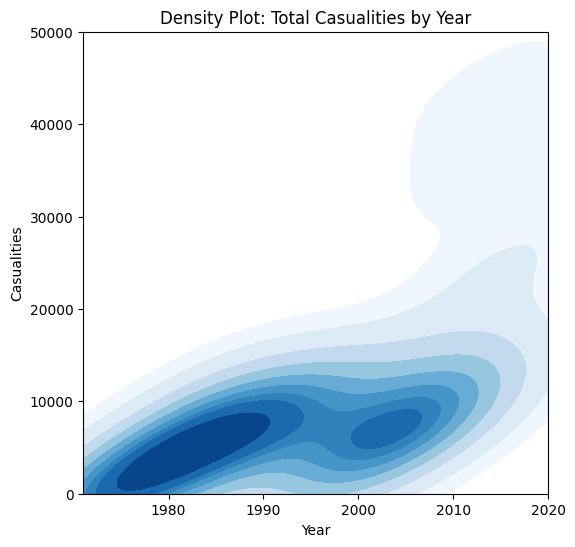

In [64]:
# Prepare DF
year_kills = gt_df.groupby('Year')['Killed'].sum()
year_kills = year_kills.drop('Unknown', errors = 'ignore')

# Plot the KDE plot
plt.figure(figsize=(6, 6))
sns.kdeplot(data=year_kills, x=year_kills.index, y=year_kills.values, fill=True, cmap='Blues')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Casualities')
plt.title('Density Plot: Total Casualities by Year')

plt.xlim(1971, 2020)
plt.ylim(0, 50000)

# Show the plot
plt.show()

**Observation:**

1) From above plot we can conclude that **frequency of attack** was **more** in **mid 70's and mid 80's** but causeed **less** no of **casualities**.

2) we can also observe that though **frequency of attack** was **less** **after 2000** but caused alot **more casualities.**


##**5.3 Demography of Killed Vs Wounded **

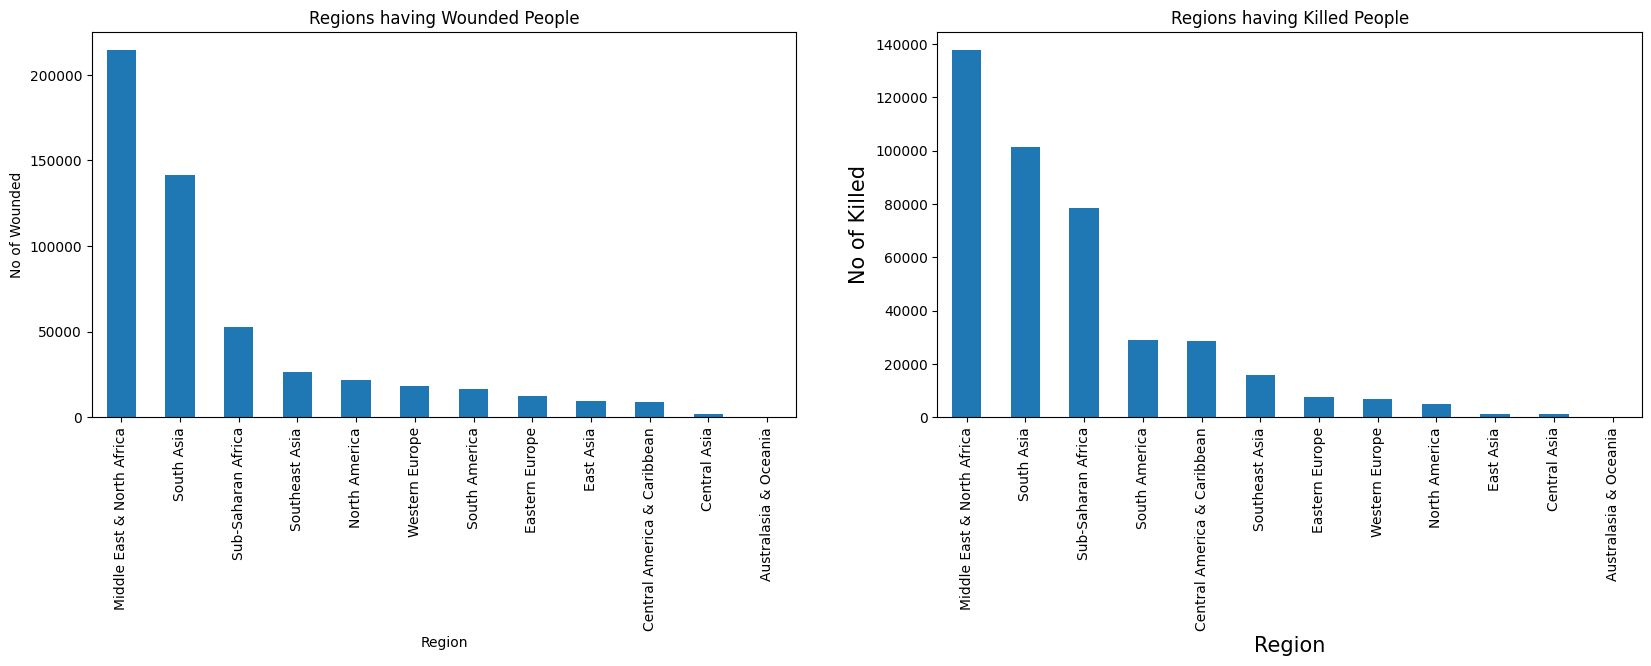

In [65]:
plt.subplot(1,2,1)
gt_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Regions having Wounded People")
plt.xlabel('Region')
plt.ylabel('No of Wounded')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
gt_df.groupby(['Region'])['Killed'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Regions having Killed People")
plt.xlabel('Region',fontsize=15)
plt.ylabel('No of Killed',fontsize =15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)

**Observation:**

1) From above plot we can conclude that number of wounded people were highest in Region of **Middle East & North Africa** while low in **Central Asia**

2) we can also observe that the number of people killed were highest in the same region of **Middle East & North Africa** while low in **Central Asia**


# **6. Weaponery Analysis.**

##**6.1 Most and least weapons used in terror attack**


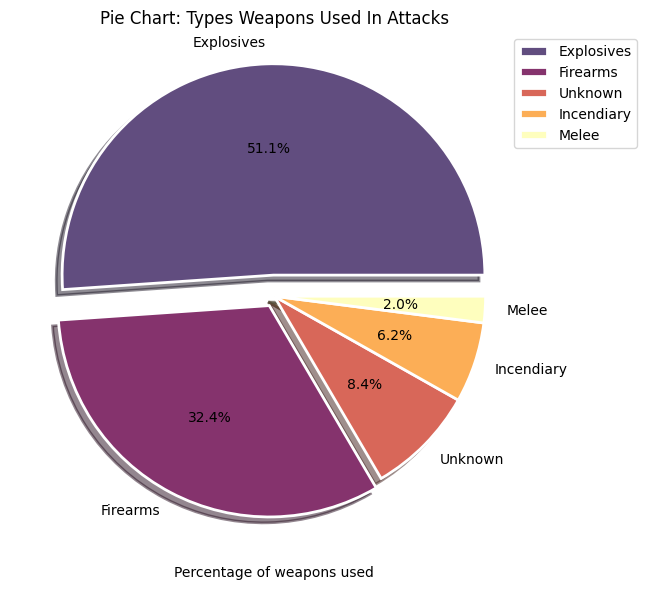

In [66]:
# Prepare DataFrame
wp_df = gt_df['Weapon Type'].value_counts().sort_values(ascending=False)

# Create the subplots
plt.figure(figsize=(15, 7))

# Pie Chart
plt.subplot(1, 2, 1)
colors = [(0.382256, 0.300007, 0.499417),
          (0.520837, 0.199549, 0.428426),
          (0.848737, 0.405403, 0.348773),
          (0.98752, 0.683399, 0.335631),
          (0.997079, 0.998023, 0.746482)]

plt.pie(wp_df.head(), labels=wp_df.head().index, autopct='%1.1f%%', colors=colors,
        explode = (0.1,0.05,0,0,0), shadow = True,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Pie Chart: Types Weapons Used In Attacks')
plt.xlabel('Percentage of weapons used')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Display plot
plt.show()

**Observation:**

1) Most used weapons used for terror attacks is **Explosive**, **Firearms** by **51.1 percent** and **32.4 percentage.**

2) Also there are **8.4 percent of Unknown weapons**



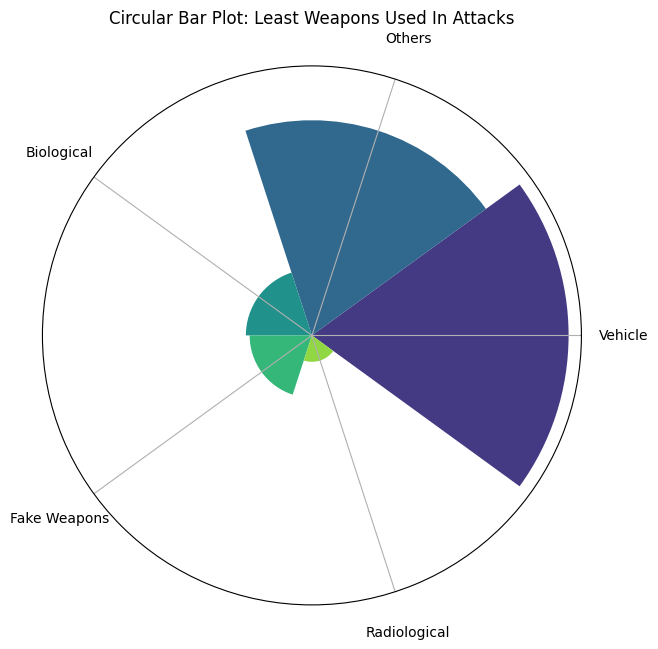

In [67]:
import matplotlib.patches as mpatches

# Prepare DataFrame
wp_df = gt_df['Weapon Type'].value_counts().sort_values(ascending=False)

# Circular Bar Plot

x_label = ['Vehicle', 'Others', 'Biological', 'Fake Weapons', 'Radiological']

plt.figure(figsize=(7, 7))
plt.subplot(projection='polar')
bar_colors = sns.color_palette("viridis", len(x_label))
theta = np.linspace(0.0, 2 * np.pi, len(x_label), endpoint=False)
width = (2 * np.pi) / len(x_label)

bars = plt.bar(theta, wp_df.tail().values, width=width, bottom=0.0, color=bar_colors)
plt.title('Circular Bar Plot: Least Weapons Used In Attacks')
plt.xticks(theta, x_label)
plt.yticks([])  # Hide y-axis ticks

# Adjust the label positions
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation_mode='anchor', ha='center')
plt.gca().xaxis.set_tick_params(pad=20)  # Increase the distance of the labels from the plot by 10 pixels

# Display the plot
plt.show()


**Observation**

1) We can also observe **Radiological** and **Fake Weapons** were least used amongst all the weapons.

##**6.2 Weaponry impact before and after year 2000**


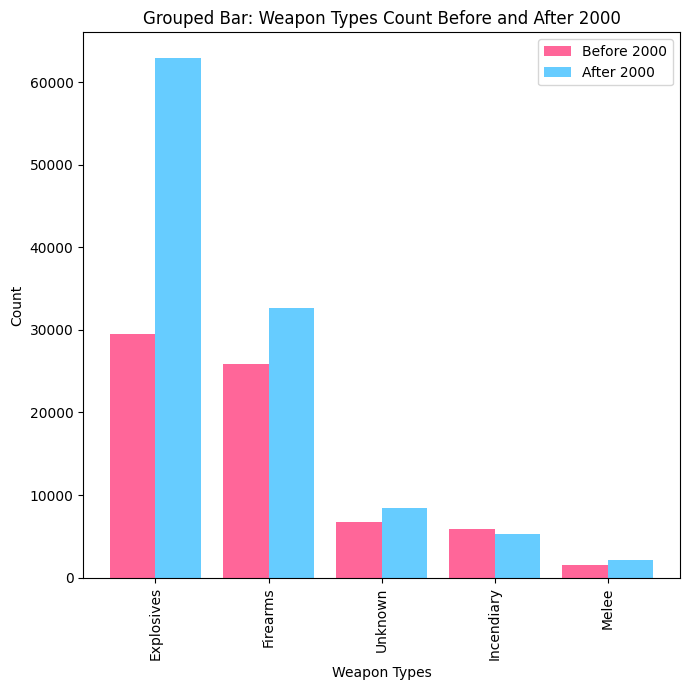

In [72]:
# Prepare dataframe
wp_bf_2000 = gt_df[gt_df['Year'] < 2000]
wp_af_2000 = gt_df[gt_df['Year'] >= 2000]

count_bf_2000 = wp_bf_2000['Weapon Type'].value_counts().sort_values(ascending=False).head()
count_af_2000 = wp_af_2000['Weapon Type'].value_counts().sort_values(ascending=False).head()
weapon_types = count_bf_2000.index.unique()

# Set the width of the bars
width = 0.4

# Set the position of the bars on the x-axis
x = np.arange(len(count_bf_2000))

# Set figure size
plt.figure(figsize=(7, 7))

# Plotting the grouped bars
plt.bar(x - width/2, count_bf_2000, width, label='Before 2000', color='#ff6699')
plt.bar(x + width/2, count_af_2000, width, label='After 2000', color='#66ccff')


# Add labels, title, and legend
plt.xlabel('Weapon Types')
plt.ylabel('Count')
plt.title('Grouped Bar: Weapon Types Count Before and After 2000')
plt.xticks(x, weapon_types, rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Observation:**

1) We can observe that with the **advancement** of the **technology**, the **access and exploitaion** of **Explosives** and **Firearms** increased significantly after year 2000.

2) Also we can observe that 3rd group bar is **Unknown** or we can say we don't access to that data but it also **significant growth**.

3) Usage of **Indendiary(fire)** slightly **decreased** after year 2000.



# ** xyz.**

##**7.1 XYZ**
